In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pymc3 as pm
import arviz as az


In [2]:
pm.__version__

'3.11.1'

In [3]:
x = np.array([-.86, -.30, -.05, .73])
# n = np.array([5, 5, 5, 5])
y  = np.array([0, 1, 3, 5])

In [4]:
with pm.Model() as m:
    a = pm.Flat('a')
    b = pm.Flat('b')
    n = pm.DiscreteUniform('n', 3, 7)

    logit = a + b * x
    theta = pm.math.invlogit(logit)

    obs = pm.Binomial('obs', p=theta, n=n, observed=y)

In [5]:
#pm.model_to_graphviz(m)



In [5]:
intervals = {
    'b': np.linspace(-10, 40, 200),
    'a': np.linspace(-5, 10, 100),
    'n': [3, 4, 5, 6, 7],
    # 'n': 3,
}

with m:
    #mmap = pm.find_MAP()
    grid = pm.compute_grid(intervals)

In [17]:
# g = np.meshgrid(*intervals.values(), indexing='ij')
# g = [a.flatten() for a in g]
# for i, variables in enumerate(zip(*g)):
#     print(i, variables)
#     break

0 (-10.0, -5.0)


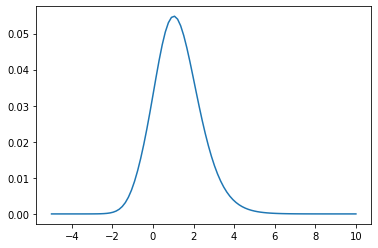

In [6]:
a = grid['a']
plt.plot(a.index, a)

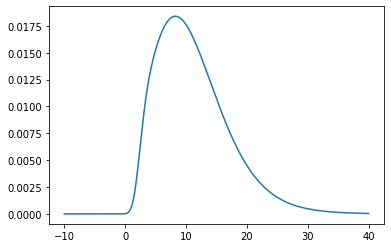

In [7]:
b = grid.marginal('b')
plt.plot(b.index, b)

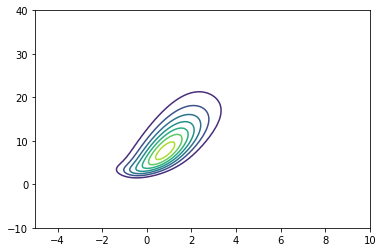

In [8]:
# joint = grid.joint(('b', 'a'))
# joint = grid.marginal(('a', 'b'))
joint = grid[['a', 'b']]
# levels = np.arange(.05, .951, .1)
plt.contour(
    grid.coords['a'],
    grid.coords['b'],
    joint.unstack(level='b').values.T,
    #levels=np.arange(.05, .951, .1)
)

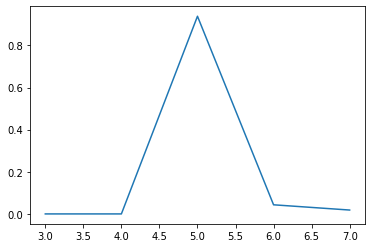

In [9]:
b = grid.marginal('n')
plt.plot(b.index, b)

In [10]:
grid.marginal(['n'])

3    0.000000
4    0.000000
5    0.938354
6    0.043285
7    0.018361
Name: PMF, dtype: float64

In [19]:
intervals = {
    'b': np.linspace(-10, 40, 200),
    'a': np.linspace(-5, 10, 100),
    # 'n': [3, 4, 5, 6, 7],
    # 'n': 5,
}

with m:
    #mmap = pm.find_MAP()
    grid = pm.compute_grid(intervals)

In [21]:
grid.marginal('a')

-5.000000     1.765231e-10
-4.848485     3.539047e-10
-4.696970     7.090299e-10
-4.545455     1.419320e-09
-4.393939     2.838359e-09
                  ...     
 9.393939     3.641625e-07
 9.545455     2.650024e-07
 9.696970     1.913322e-07
 9.848485     1.369370e-07
 10.000000    9.705639e-08
Name: PMF, Length: 100, dtype: float64

In [27]:
m.basic_RVs

[a ~ Flat, b ~ Flat, n ~ DiscreteUniform, obs ~ Binomial]

In [35]:
set(m.named_vars.keys()) - set(m)

set()

In [145]:
with pm.Model() as m:
    x = pm.Uniform('x', 0, 1, transform=None)
    y = pm.Uniform('y', 0, x, transform=None)

In [179]:
intervals = {
    'x': np.linspace(0, 1, 10),
    # 'y': 0.25,
}

In [180]:
with m:
    grid = pm.compute_grid(intervals)

No grid points were defined for variable y ~ Uniform. Automatically adding testval 0.25 to grid


In [181]:
grid['x']

0.000000    0.000000
0.111111    0.000000
0.222222    0.000000
0.333333    0.250821
0.444444    0.188116
0.555556    0.150493
0.666667    0.125411
0.777778    0.107495
0.888889    0.094058
1.000000    0.083607
Name: PMF, dtype: float64

In [182]:
grid.coords

{'x': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 'y': array([0.25])}

In [183]:
grid['y']

0.25    1.0
Name: PMF, dtype: float64

In [66]:
from pymc3.theanof import inputvars
from pymc3.blocking import ArrayOrdering, DictToArrayBijection
from pymc3.util import *

In [88]:
grid_vars = (m[v] for v in intervals.keys())
grid_input_vars = inputvars(list(grid_vars))

In [89]:
grid_input_vars

[x_interval__ ~ TransformedDistribution]

In [91]:
is_transformed_name(grid_input_vars[0].name)

True

In [87]:
logp_func = bij.mapf(m.fastlogp_nojac)

In [91]:
logp_func(0)

array(2.07944154)

In [96]:
grid = np.meshgrid(*intervals.values(), indexing='ij')
grid[0].shape

(10,)

In [35]:
m.test_point


{'x_interval__': array(0.), 'y_interval__': array(0.)}

In [72]:
grid_input_vars = [m[v] for v in intervals.keys()]
grid_input_vars = inputvars(grid_input_vars)
grid_input_vars

[x_interval__ ~ TransformedDistribution]

In [73]:
grid_input_vars

[x_interval__ ~ TransformedDistribution]

In [65]:

set(m.named_vars.keys()) - set(v.name for v in m.basic_RVs)

{'x'}

dict_keys(['x_interval__', 'x', 'y'])

In [69]:
get_default_varnames(m.named_vars, include_transformed=False)

['x', 'y']

In [70]:
is_transformed_name(m.x)


[autoreload of pymc3.grid.compute_grid failed: Traceback (most recent call last):
  File "/home/ricardo/Documents/Projects/pymc3-venv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/ricardo/Documents/Projects/pymc3-venv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home

AttributeError: 'TransformedRV' object has no attribute 'endswith'

In [99]:
model = m
grid_input_vars = [model[v] for v in intervals.keys()]
grid_input_vars

[x ~ Uniform, y ~ Uniform]

In [103]:
theano_input_vars = set(inputvars(grid_input_vars))

In [104]:
user_input_vars = set(grid_input_vars)


In [106]:
user_input_vars - theano_input_vars

{x ~ Uniform, y ~ Uniform}

In [110]:
a = list(user_input_vars)[0]
a

y ~ Uniform

In [111]:
a.transformation


In [114]:
get_transformed_name(a, a.transformation)

'y ~ Uniform_interval__'

In [123]:
get_transformed(a)

y_interval__ ~ TransformedDistribution

In [128]:
a.transformation.forward_val(0)

/home/ricardo/Documents/Projects/pymc3/pymc3/distributions/transforms.py:294: RuntimeWarning: divide by zero encountered in log
  return floatX(np.log(x - a) - np.log(b - x))


-inf

In [140]:
a.get_test_value()

array(0.25)

In [173]:
np.atleast_1d(a.get_test_value())

array([0.25])